# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
%pip install matplotlib
%pip install scipy
%pip install citipy

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 587


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=imperial"
    print(f"API Request URL: {city_url}")
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        # Log the successful retrieval of data for the city
        print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=grytviken&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | grytviken
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=adamstown&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | adamstown
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=prineville&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 3 of Set 1 | prineville
Processing Record 4 of Set 1 | prineville
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=tolanaro&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 4 of Set 1 | tolanaro
Processing Record 5 of Set 1 | tolanaro
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=port-aux-francais&appid=67

Processing Record 39 of Set 1 | margaret river
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=ar rutbah&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 39 of Set 1 | ar rutbah
Processing Record 40 of Set 1 | ar rutbah
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=assomada&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 40 of Set 1 | assomada
Processing Record 41 of Set 1 | assomada
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=northam&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 41 of Set 1 | northam
Processing Record 42 of Set 1 | northam
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=cockburn town&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 42 of Set 1 | cockburn town
Processing Record 43 of Set 1 | cockburn town
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=bethel&appid=67abc3000dcb573

Processing Record 27 of Set 2 | adiake
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=igrim&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 27 of Set 2 | igrim
Processing Record 28 of Set 2 | igrim
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=sosnovo&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 28 of Set 2 | sosnovo
Processing Record 29 of Set 2 | sosnovo
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=egilsstadir&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 29 of Set 2 | egilsstadir
Processing Record 30 of Set 2 | egilsstadir
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=vershino-darasunskiy&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 30 of Set 2 | vershino-darasunskiy
Processing Record 31 of Set 2 | vershino-darasunskiy
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=praia da vitoria&a

Processing Record 16 of Set 3 | nizhnesortymskiy
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=yellowknife&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 16 of Set 3 | yellowknife
Processing Record 17 of Set 3 | yellowknife
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=natchitoches&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 17 of Set 3 | natchitoches
Processing Record 18 of Set 3 | natchitoches
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=anshun&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 18 of Set 3 | anshun
Processing Record 19 of Set 3 | anshun
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=pariaman&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 19 of Set 3 | pariaman
Processing Record 20 of Set 3 | pariaman
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=al ghayzah&appid=67abc3000

Processing Record 5 of Set 4 | qaqortoq
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=ilulissat&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 5 of Set 4 | ilulissat
Processing Record 6 of Set 4 | ilulissat
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=isafjordur&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 6 of Set 4 | isafjordur
Processing Record 7 of Set 4 | isafjordur
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=vilyuchinsk&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 7 of Set 4 | vilyuchinsk
Processing Record 8 of Set 4 | vilyuchinsk
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=ha'il&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 8 of Set 4 | ha'il
Processing Record 9 of Set 4 | ha'il
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=nema&appid=67abc3000dcb573087c9fd73d93a6b2c&units

Processing Record 44 of Set 4 | chebba
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=aketi&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 44 of Set 4 | aketi
Processing Record 45 of Set 4 | aketi
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=kismayo&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 45 of Set 4 | kismayo
Processing Record 46 of Set 4 | kismayo
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=goias&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 46 of Set 4 | goias
Processing Record 47 of Set 4 | goias
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=bonthe&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 47 of Set 4 | bonthe
Processing Record 48 of Set 4 | bonthe
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=petra&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 

Processing Record 33 of Set 5 | yuzhno-kurilsk
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=pergamino&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 33 of Set 5 | pergamino
Processing Record 34 of Set 5 | pergamino
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=bartica&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 34 of Set 5 | bartica
Processing Record 35 of Set 5 | bartica
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=takab&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 35 of Set 5 | takab
Processing Record 36 of Set 5 | takab
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=hobyo&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 36 of Set 5 | hobyo
Processing Record 37 of Set 5 | hobyo
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=waingapu&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperia

Processing Record 22 of Set 6 | kristiansund
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=kingston&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 22 of Set 6 | kingston
Processing Record 23 of Set 6 | kingston
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=lively&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 23 of Set 6 | lively
Processing Record 24 of Set 6 | lively
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=antofagasta&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 24 of Set 6 | antofagasta
Processing Record 25 of Set 6 | antofagasta
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=sola&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 25 of Set 6 | sola
Processing Record 26 of Set 6 | sola
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=eyl&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imper

Processing Record 11 of Set 7 | lazaro cardenas
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=acworth&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 11 of Set 7 | acworth
Processing Record 12 of Set 7 | acworth
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=la passe&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 12 of Set 7 | la passe
Processing Record 13 of Set 7 | la passe
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=labrador city&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 13 of Set 7 | labrador city
Processing Record 14 of Set 7 | labrador city
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=buka&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 14 of Set 7 | buka
Processing Record 15 of Set 7 | buka
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=paphos&appid=67abc3000dcb573087c9fd73d93a6

Processing Record 50 of Set 7 | ocean shores
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=nueva gerona&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 0 of Set 8 | nueva gerona
Processing Record 1 of Set 8 | nueva gerona
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=selebi-phikwe&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 1 of Set 8 | selebi-phikwe
Processing Record 2 of Set 8 | selebi-phikwe
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=khandyga&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 2 of Set 8 | khandyga
Processing Record 3 of Set 8 | khandyga
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=tyup&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 3 of Set 8 | tyup
Processing Record 4 of Set 8 | tyup
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=tyumen&appid=67abc3000dcb573087c9fd73d

Processing Record 39 of Set 8 | thenia
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=st. john's&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 39 of Set 8 | st. john's
Processing Record 40 of Set 8 | st. john's
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=quezon&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 40 of Set 8 | quezon
Processing Record 41 of Set 8 | quezon
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=carnarvon&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 41 of Set 8 | carnarvon
Processing Record 42 of Set 8 | carnarvon
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=berezovo&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 42 of Set 8 | berezovo
Processing Record 43 of Set 8 | berezovo
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=santa ana&appid=67abc3000dcb573087c9fd73d93a6b2c

Processing Record 29 of Set 9 | kunshan
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=carbondale&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 29 of Set 9 | carbondale
Processing Record 30 of Set 9 | carbondale
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=oneonta&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 30 of Set 9 | oneonta
Processing Record 31 of Set 9 | oneonta
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=tazacorte&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 31 of Set 9 | tazacorte
Processing Record 32 of Set 9 | tazacorte
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=nacozari de garcia&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 32 of Set 9 | nacozari de garcia
Processing Record 33 of Set 9 | nacozari de garcia
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=messaad&appid=

Processing Record 18 of Set 10 | camberwell
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=benjamin constant&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 18 of Set 10 | benjamin constant
Processing Record 19 of Set 10 | benjamin constant
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=mangrol&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 19 of Set 10 | mangrol
Processing Record 20 of Set 10 | mangrol
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=podgornoye&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 20 of Set 10 | podgornoye
Processing Record 21 of Set 10 | podgornoye
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=ishigaki&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 21 of Set 10 | ishigaki
Processing Record 22 of Set 10 | ishigaki
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=itai&app

Processing Record 7 of Set 11 | fale old settlement
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=perryton&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 7 of Set 11 | perryton
Processing Record 8 of Set 11 | perryton
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=oodweyne&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 8 of Set 11 | oodweyne
Processing Record 9 of Set 11 | oodweyne
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=north elba&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 9 of Set 11 | north elba
Processing Record 10 of Set 11 | north elba
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=madalena&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 10 of Set 11 | madalena
Processing Record 11 of Set 11 | madalena
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=fismes&appid=67abc3000dcb5730

Processing Record 46 of Set 11 | priozersk
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=baud&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 46 of Set 11 | baud
Processing Record 47 of Set 11 | baud
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=turpan&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 47 of Set 11 | turpan
Processing Record 48 of Set 11 | turpan
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=lagoa&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 48 of Set 11 | lagoa
Processing Record 49 of Set 11 | lagoa
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=sligo&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 49 of Set 11 | sligo
Processing Record 50 of Set 11 | sligo
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=mata-utu&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing R

Processing Record 35 of Set 12 | woolgoolga
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=nishinoomote&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 35 of Set 12 | nishinoomote
Processing Record 36 of Set 12 | nishinoomote
API Request URL: http://api.openweathermap.org/data/2.5/weather?q=necochea&appid=67abc3000dcb573087c9fd73d93a6b2c&units=imperial
Processing Record 36 of Set 12 | necochea
Processing Record 37 of Set 12 | necochea
-----------------------------
Data Retrieval Complete      
-----------------------------


In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,33.44,81,49,8.23,GS,1697041563
1,adamstown,-25.0660,-130.1015,68.54,71,73,12.06,PN,1697041563
2,prineville,44.2999,-120.8345,50.11,73,75,10.36,US,1697041564
3,tolanaro,-25.0319,46.9987,69.87,94,75,13.80,MG,1697041564
4,port-aux-francais,-49.3500,70.2167,36.75,69,100,24.23,TF,1697041565


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,33.44,81,49,8.23,GS,1697041563
1,adamstown,-25.0660,-130.1015,68.54,71,73,12.06,PN,1697041563
2,prineville,44.2999,-120.8345,50.11,73,75,10.36,US,1697041564
3,tolanaro,-25.0319,46.9987,69.87,94,75,13.80,MG,1697041564
4,port-aux-francais,-49.3500,70.2167,36.75,69,100,24.23,TF,1697041565


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

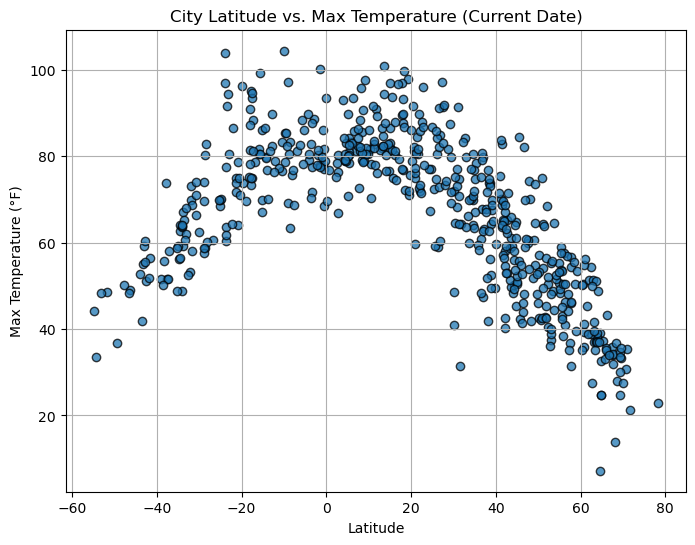

In [11]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

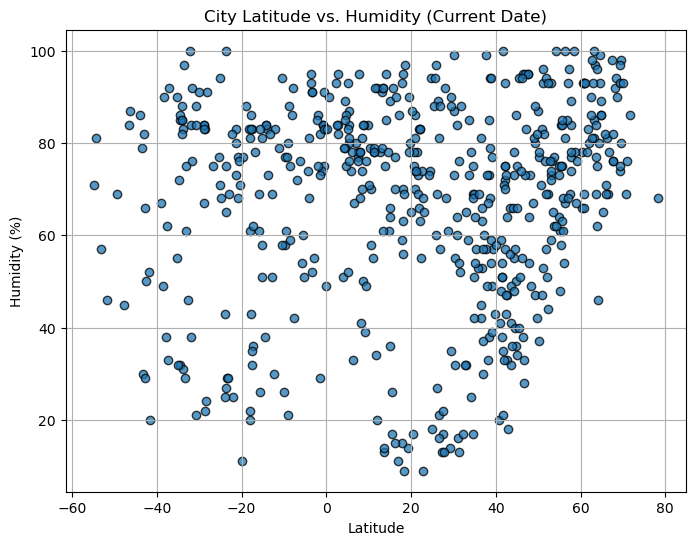

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

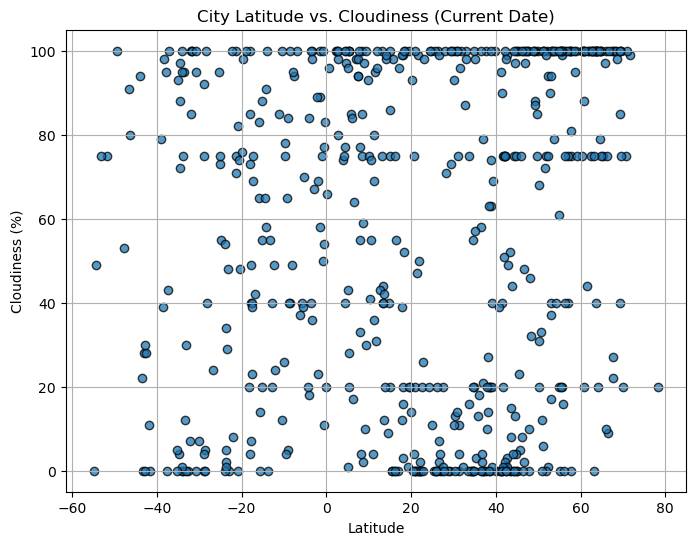

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

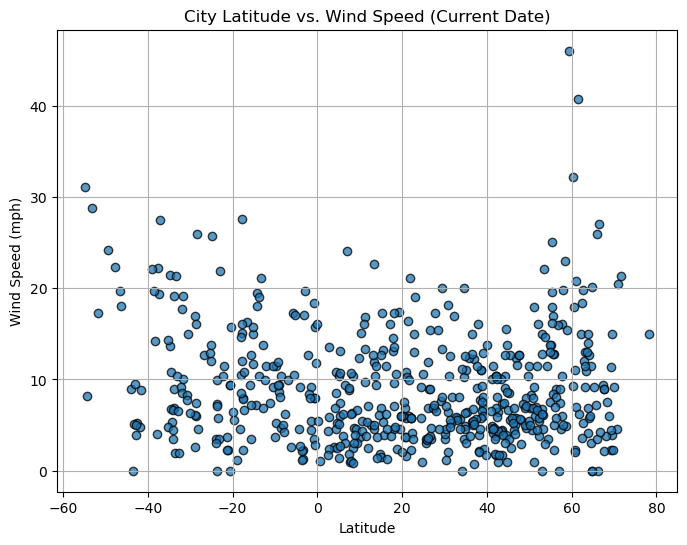

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(8, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Current Date)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, x_label, y_label, line_position, output_file):
    # Perform linear regression
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    line_equation = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    
    # Add regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_equation, line_position, fontsize=12, color="red")
    
    # Set plot properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save the figure
    plt.savefig(output_file)
    
    # Show plot
    plt.show()


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,prineville,44.2999,-120.8345,50.11,73,75,10.36,US,1697041564
6,tiksi,71.6872,128.8694,21.29,86,99,21.32,RU,1697041566
7,letterkenny,54.9500,-7.7333,55.29,64,61,7.49,IE,1697041566
9,la mira tumbiscatio,18.6833,-102.2833,72.28,97,100,2.39,MX,1697041567
12,la ronge,55.1001,-105.2842,48.45,61,0,13.80,CA,1697041569


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,33.44,81,49,8.23,GS,1697041563
1,adamstown,-25.0660,-130.1015,68.54,71,73,12.06,PN,1697041563
3,tolanaro,-25.0319,46.9987,69.87,94,75,13.80,MG,1697041564
4,port-aux-francais,-49.3500,70.2167,36.75,69,100,24.23,TF,1697041565
5,byron bay,-28.6500,153.6167,58.71,83,5,6.04,AU,1697041393


###  Temperature vs. Latitude Linear Regression Plot

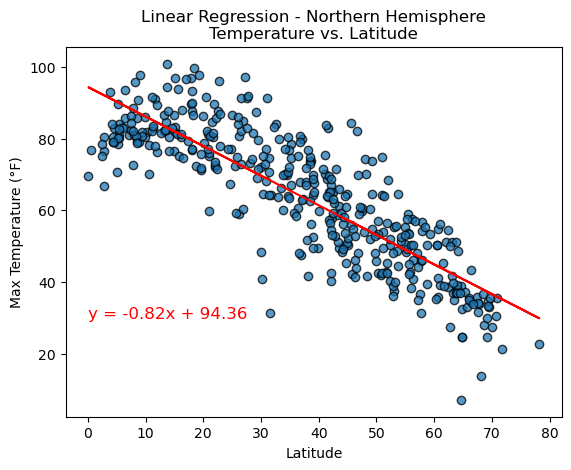

In [18]:
# Linear regression on Northern Hemisphere
# Import scipy.stats for linear regression
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, line_position, output_file):
    # Perform linear regression
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    line_equation = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    
    # Add regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_equation, line_position, fontsize=12, color="red")
    
    # Set plot properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save the figure
    plt.savefig(output_file)
    
    # Show plot
    plt.show()

# Linear regression on Northern Hemisphere - Temperature vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Linear Regression - Northern Hemisphere\nTemperature vs. Latitude",
                       "Latitude", "Max Temperature (°F)", (0, 30), "output_data/Northern_Temp_vs_Lat.png")


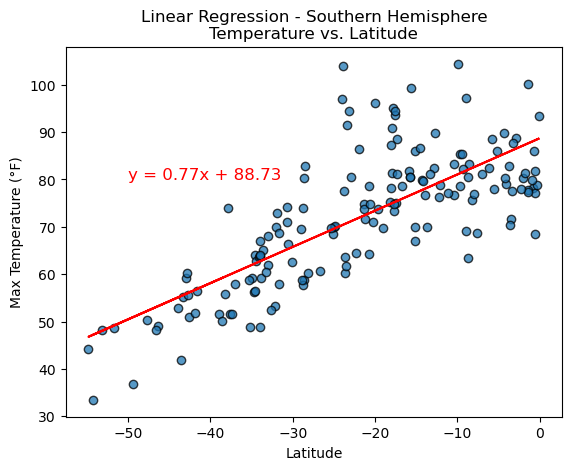

In [19]:
# Linear regression on Southern Hemisphere
# Import scipy.stats for linear regression
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, line_position, output_file):
    # Perform linear regression
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    line_equation = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    
    # Add regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_equation, line_position, fontsize=12, color="red")
    
    # Set plot properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save the figure
    plt.savefig(output_file)
    
    # Show plot
    plt.show()

# Linear regression on Southern Hemisphere - Temperature vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Linear Regression - Southern Hemisphere\nTemperature vs. Latitude",
                       "Latitude", "Max Temperature (°F)", (-50, 80), "output_data/Southern_Temp_vs_Lat.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

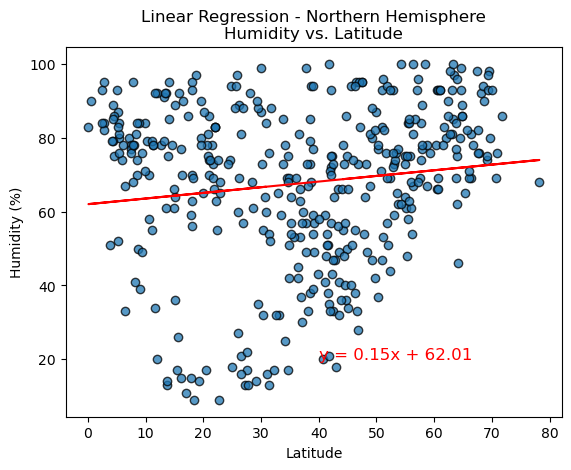

In [20]:
# Northern Hemisphere
# Import scipy.stats for linear regression
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, line_position, output_file):
    # Perform linear regression
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    line_equation = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    
    # Add regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_equation, line_position, fontsize=12, color="red")
    
    # Set plot properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save the figure
    plt.savefig(output_file)
    
    # Show plot
    plt.show()

# Linear regression on Northern Hemisphere - Humidity vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Linear Regression - Northern Hemisphere\nHumidity vs. Latitude",
                       "Latitude", "Humidity (%)", (40, 20), "output_data/Northern_Humidity_vs_Lat.png")


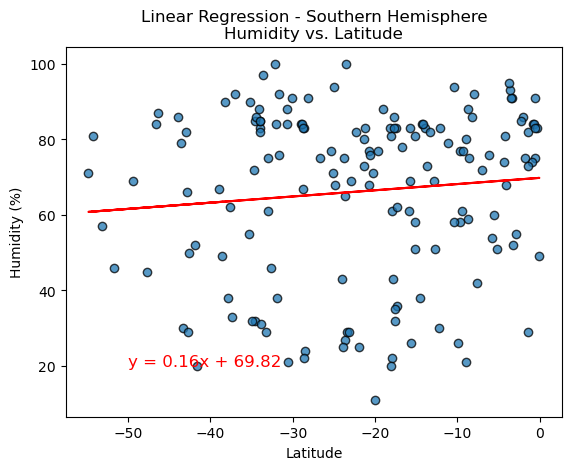

In [21]:
# Southern Hemisphere
# Import scipy.stats for linear regression
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, line_position, output_file):
    # Perform linear regression
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    line_equation = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    
    # Add regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_equation, line_position, fontsize=12, color="red")
    
    # Set plot properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save the figure
    plt.savefig(output_file)
    
    # Show plot
    plt.show()

# Linear regression on Southern Hemisphere - Humidity vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Linear Regression - Southern Hemisphere\nHumidity vs. Latitude",
                       "Latitude", "Humidity (%)", (-50, 20), "output_data/Southern_Humidity_vs_Lat.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

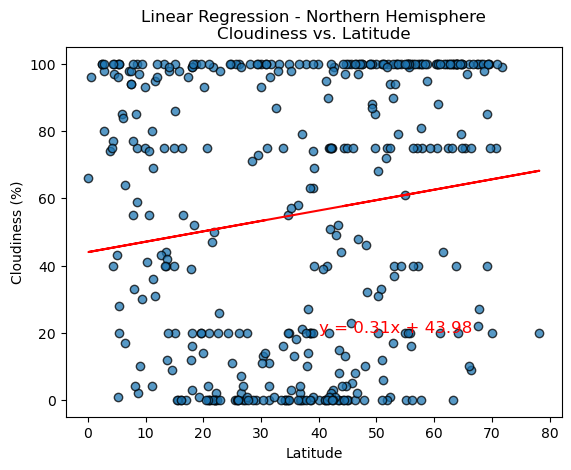

In [22]:
# Northern Hemisphere
# Import scipy.stats for linear regression
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, line_position, output_file):
    # Perform linear regression
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    line_equation = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    
    # Add regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_equation, line_position, fontsize=12, color="red")
    
    # Set plot properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save the figure
    plt.savefig(output_file)
    
    # Show plot
    plt.show()

# Linear regression on Northern Hemisphere - Cloudiness vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Linear Regression - Northern Hemisphere\nCloudiness vs. Latitude",
                       "Latitude", "Cloudiness (%)", (40, 20), "output_data/Northern_Cloudiness_vs_Lat.png")


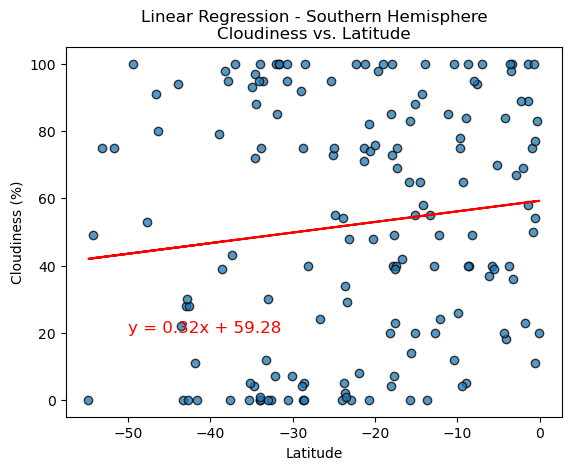

In [23]:
# Southern Hemisphere
# Import scipy.stats for linear regression
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, line_position, output_file):
    # Perform linear regression
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    line_equation = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    
    # Add regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_equation, line_position, fontsize=12, color="red")
    
    # Set plot properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save the figure
    plt.savefig(output_file)
    
    # Show plot
    plt.show()

# Linear regression on Southern Hemisphere - Cloudiness vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Linear Regression - Southern Hemisphere\nCloudiness vs. Latitude",
                       "Latitude", "Cloudiness (%)", (-50, 20), "output_data/Southern_Cloudiness_vs_Lat.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

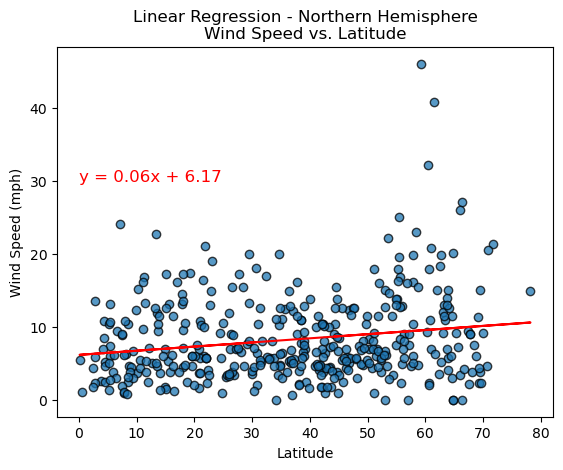

In [24]:
# Northern Hemisphere
# Import scipy.stats for linear regression
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, line_position, output_file):
    # Perform linear regression
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    line_equation = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    
    # Add regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_equation, line_position, fontsize=12, color="red")
    
    # Set plot properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save the figure
    plt.savefig(output_file)
    
    # Show plot
    plt.show()

# Linear regression on Northern Hemisphere - Wind Speed vs. Latitude
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Linear Regression - Northern Hemisphere\nWind Speed vs. Latitude",
                       "Latitude", "Wind Speed (mph)", (0, 30), "output_data/Northern_WindSpeed_vs_Lat.png")


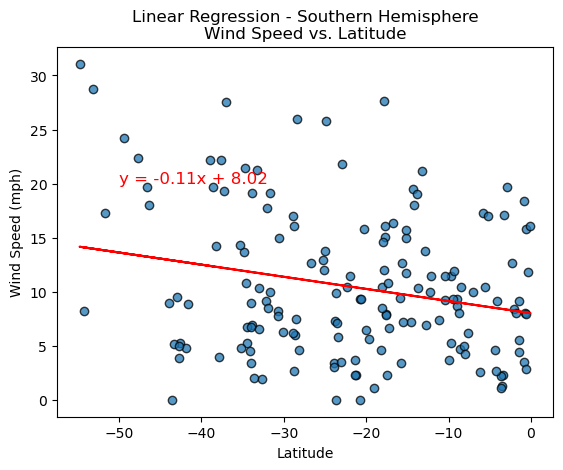

In [25]:
# Southern Hemisphere
# Import scipy.stats for linear regression
from scipy.stats import linregress

# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, x_label, y_label, line_position, output_file):
    # Perform linear regression
    (slope, intercept, r_value, _, _) = linregress(x_values, y_values)
    
    # Calculate regression values
    regress_values = x_values * slope + intercept
    line_equation = f'y = {slope:.2f}x + {intercept:.2f}'
    
    # Create scatter plot
    plt.scatter(x_values, y_values, edgecolors="black", alpha=0.75)
    
    # Add regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Annotate the line equation on the plot
    plt.annotate(line_equation, line_position, fontsize=12, color="red")
    
    # Set plot properties
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Save the figure
    plt.savefig(output_file)
    
    # Show plot
    plt.show()

# Linear regression on Southern Hemisphere - Wind Speed vs. Latitude
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Linear Regression - Southern Hemisphere\nWind Speed vs. Latitude",
                       "Latitude", "Wind Speed (mph)", (-50, 20), "output_data/Southern_WindSpeed_vs_Lat.png")


**Discussion about the linear relationship:** YOUR RESPONSE HERE